In [1]:
%matplotlib inline 
import pandas as pd 
import matplotlib.pyplot as plt 
from textblob import TextBlob 
import sklearn 
import numpy as np 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix 
 
np.random.seed(47) 
 


In [2]:
reviews = pd.read_csv('DataScienceJobsResumes.csv', encoding = 'unicode_escape') 

In [3]:
print(reviews.head())
print(reviews.tail())

                              jobOrResumeDescription            role  \
0  : Artificial Intelligence / Machine Learning D...       Developer   
1   : Data Scientist/Architect\n: 6+ months + Hig...  Data Scientist   
2   : Data Analyst\n: Davidson, NC\n: 04+ Months\...    Data Analyst   
3   : Big Data Architect or Data Scientist\n: New...  Data Scientist   
4  : Data Engineer\n: Woonsocket, RI\n: 6+ Months...   Data Engineer   

      sourceType  
0  job recruiter  
1  job recruiter  
2  job recruiter  
3  job recruiter  
4  job recruiter  
                                jobOrResumeDescription            role  \
196  \n\n and Experience:\n* Ten years of experienc...  Data Scientist   
197   \n \n~  and  ~\n \t \n- Python \t- \tMolecula...  Data Scientist   
198  M.S. Statistics graduate looking for a full-ti...  Data Scientist   
199  \nIm a data scientist with a background in ne...  Data Scientist   
200  \n:\n* Machine learning in R, and other softwa...  Data Scientist   

    sour

In [4]:
print(reviews.shape)

(201, 3)


In [5]:
import regex
def preprocessor(text):
    text = regex.sub('<[^>]*>', '', text)
    emoticons = regex.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = regex.sub('[\W]+', ' ', text.lower()) +\
        ' '.join(emoticons).replace('-', '')
    return text

In [6]:


reviews.tail()



,jobOrResumeDescription,role,sourceType
196,\n\n and Experience:\n* Ten years of experienc...,Data Scientist,resume
197,\n \n~ and ~\n \t \n- Python \t- \tMolecula...,Data Scientist,resume
198,M.S. Statistics graduate looking for a full-ti...,Data Scientist,resume
199,\nIm a data scientist with a background in ne...,Data Scientist,resume
200,"\n:\n* Machine learning in R, and other softwa...",Data Scientist,resume


In [7]:
import numpy as np

reviews = reviews.reindex(np.random.permutation(reviews.index))

print(reviews.head())
print(reviews.tail())

                                jobOrResumeDescription            role  \
5    PhD or MS with 3 years post MS experience Comp...  Data Scientist   
156  * A data scientist  with 7 years of progressiv...  Data Scientist   
0    : Artificial Intelligence / Machine Learning D...       Developer   
99   Senior Data Scientist\nKareo Inc2 re - Irvine,...  Data Scientist   
187  My life  experience has been in assistant mana...  Data Scientist   

        sourceType  
5    job recruiter  
156         resume  
0    job recruiter  
99        Job post  
187         resume  
                                jobOrResumeDescription            role  \
72   Senior Healthcare Data Analyst\nAdvantmed98 re...    Data Analyst   
8    Research Computing SME - 19-03563\n \n\n    : ...  Data Scientist   
71   Sr Financial Analyst\nApria Healthcare1,853 re...    Data Analyst   
134  ? Highly productive and effective Financial An...  Data Scientist   
135  Business Data Analyst who maximizes productivi...  Dat

In [8]:
reviews.groupby('sourceType').describe()

jobOrResumeDescription         \
                               count unique   
sourceType                                    
Job post                          59     58   
job recruiter                     42     42   
resume                           100    100   

                                                                       role  \
                                                             top freq count   
sourceType                                                                    
Job post       Senior Data Analyst\nKelly Services14,506 re -...    2    59   
job recruiter   : Data Scientist\n\n : Philadelphia , PA\n\nE...    1    42   
resume         To continue learning and innovating the world ...    1   100   

                                           
              unique             top freq  
sourceType                                 
Job post           3    Data Analyst   41  
job recruiter      5  Data Scientist   17  
resume             1  Data Scientist  100

In [9]:


reviews.groupby('role').describe()



jobOrResumeDescription         \
                                   count unique   
role                                              
Data Analyst                          49     48   
Data Engineer                         13     13   
Data Scientist                       130    130   
Developer                              8      8   
Software Engineer                      1      1   

                                                                           \
                                                                 top freq   
role                                                                        
Data Analyst       Senior Data Analyst\nKelly Services14,506 re -...    2   
Data Engineer      \n: Data  Engineer \n\n: Plano TX\n\nTerms: Lo...    1   
Data Scientist     To continue learning and innovating the world ...    1   
Developer          Hive Big Data Developer\n\nPhoenix, AZ\n\n12+ ...    1   
Software Engineer   Ref.                         : 19-62193\n    ...    1   

                  sourceType                             
                       count unique            top freq  
role                                                     
Data Analyst              49      2       Job post   41  
Data Engineer             13      2  job recruiter    8  
Data Scientist           130      3         resume  100  
Developer                  8      1  job recruiter    8  
Software Engineer          1      1  job recruiter    1

In [10]:
reviews['length'] = reviews['jobOrResumeDescription'].map(lambda text: len(text))
print(reviews.head())

                                jobOrResumeDescription            role  \
5    PhD or MS with 3 years post MS experience Comp...  Data Scientist   
156  * A data scientist  with 7 years of progressiv...  Data Scientist   
0    : Artificial Intelligence / Machine Learning D...       Developer   
99   Senior Data Scientist\nKareo Inc2 re - Irvine,...  Data Scientist   
187  My life  experience has been in assistant mana...  Data Scientist   

        sourceType  length  
5    job recruiter     801  
156         resume   22827  
0    job recruiter     909  
99        Job post    4129  
187         resume    4127  


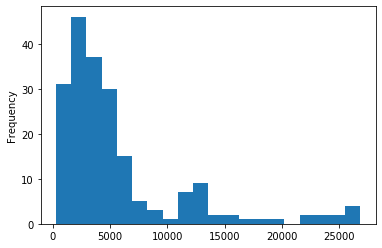

In [11]:


reviews.length.plot(bins=20, kind='hist')

In [12]:
reviews.length.describe()

count      201.000000
mean      5694.482587
std       5759.567865
min        303.000000
25%       2202.000000
50%       3873.000000
75%       6120.000000
max      26846.000000
Name: length, dtype: float64

In [13]:


print(list(reviews.jobOrResumeDescription[reviews.length > 40].index))
print(list(reviews.role[reviews.length > 40]))



[5, 156, 0, 99, 187, 74, 128, 36, 160, 141, 132, 20, 63, 108, 16, 133, 25, 158, 96, 9, 1, 148, 62, 172, 15, 32, 112, 164, 45, 10, 154, 162, 168, 3, 13, 31, 183, 92, 82, 121, 192, 182, 26, 178, 193, 130, 190, 131, 83, 78, 40, 115, 69, 102, 37, 139, 149, 165, 47, 85, 189, 35, 106, 42, 81, 46, 18, 107, 6, 155, 39, 64, 76, 77, 61, 188, 151, 70, 24, 111, 38, 91, 195, 67, 94, 54, 44, 11, 127, 119, 33, 170, 150, 200, 143, 145, 136, 117, 57, 29, 19, 116, 22, 126, 104, 58, 177, 171, 122, 197, 60, 88, 129, 191, 174, 110, 98, 105, 43, 49, 14, 194, 118, 103, 97, 167, 93, 30, 95, 181, 41, 152, 142, 17, 109, 120, 157, 138, 28, 100, 56, 12, 140, 185, 186, 146, 199, 124, 89, 176, 153, 175, 166, 144, 2, 75, 52, 84, 51, 90, 159, 86, 68, 125, 147, 21, 27, 161, 79, 137, 101, 163, 4, 66, 34, 73, 48, 53, 184, 169, 196, 180, 123, 87, 65, 114, 50, 55, 113, 173, 198, 7, 59, 23, 80, 179, 72, 8, 71, 134, 135]
['Data Scientist', 'Data Scientist', 'Developer', 'Data Scientist', 'Data Scientist', 'Data Analyst', 'D

Wall time: 375 ms


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002E71AAC0668>,
      dtype=object)

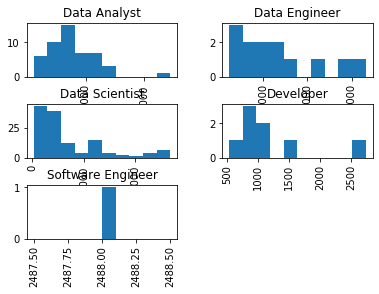

In [14]:


%%time
reviews.hist(column='length', by='role', bins=10)



In [15]:
def split_into_tokens(review):
    
    #review = unicode(review, 'iso-8859-1')# in python 3 the default of str() previously python2 as unicode() is utf-8
    return TextBlob(review).words

In [16]:
reviews.jobOrResumeDescription.head().apply(split_into_tokens)

5      [PhD, or, MS, with, 3, years, post, MS, experi...
156    [A, data, scientist, with, 7, years, of, progr...
0      [Artificial, Intelligence, Machine, Learning, ...
99     [Senior, Data, Scientist, Kareo, Inc2, re, Irv...
187    [My, life, experience, has, been, in, assistan...
Name: jobOrResumeDescription, dtype: object

In [17]:


TextBlob("hello world, how is it going?").tags  # list of (word, POS) pairs



[('hello', 'JJ'),
 ('world', 'NN'),
 ('how', 'WRB'),
 ('is', 'VBZ'),
 ('it', 'PRP'),
 ('going', 'VBG')]

In [18]:


import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\m\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:


from nltk.corpus import stopwords

stop = stopwords.words('english')
stop = stop + [u'a',u'b',u'c',u'd',u'e',u'f',u'g',u'h',u'i',u'j',u'k',u'l',u'm',u'n',u'o',u'p',u'q',u'r',u's',u't',u'v',u'w',u'x',u'y',u'z']



In [20]:
def split_into_lemmas(review):
    #review = unicode(review, 'iso-8859-1')
    review = review.lower()
    #review = unicode(review, 'utf8').lower()
    #review = str(review).lower()
    words = TextBlob(review).words
    # for each word, take its "base form" = lemma 
    return [word.lemma for word in words if word not in stop]

reviews.jobOrResumeDescription.head().apply(split_into_lemmas)

5      [phd, m, 3, year, post, m, experience, compute...
156    [data, scientist, 7, year, progressive, experi...
0      [artificial, intelligence, machine, learning, ...
99     [senior, data, scientist, kareo, inc2, irvine,...
187    [life, experience, assistant, manager, managem...
Name: jobOrResumeDescription, dtype: object

In [21]:
%%time
bow_transformer = CountVectorizer(analyzer=split_into_lemmas).fit(reviews['jobOrResumeDescription'])
print(len(bow_transformer.vocabulary_))

10625
Wall time: 6.52 s


In [22]:
review4 = reviews['jobOrResumeDescription'][42]
print(review4)

At TGS, data is a core part of our business and our data focused software developers are among our most valued resources. This  is mission critical, so we?re  for an uncommonly reliable professional who enjoys coding, ing with and analyzing data, and providing support for production systems. In addition to programming and data analysis, this  is likely to involve interaction with external resources such as data providers, brokers, dealers, and software vendors.

Successful candis will have experience in a number of the following general areas:

    Programming: strong experience with Python, Java, SQL, and/or similar languages
    Large data sets: experience developing programs to parse, process, clean, organize, and analyze large data sets
    Applications: experience designing, developing, and maintaining software applications
    Vendor interaction: ing with external resources to solve problems, acquire data, and improve relationships.
    System : experience with scripting language

In [23]:
bow4 = bow_transformer.transform([review4])
print(bow4)

  (0, 38)	2
  (0, 152)	1
  (0, 311)	1
  (0, 345)	1
  (0, 651)	1
  (0, 698)	1
  (0, 791)	1
  (0, 809)	1
  (0, 934)	1
  (0, 945)	1
  (0, 970)	1
  (0, 977)	1
  (0, 982)	2
  (0, 1136)	4
  (0, 1195)	1
  (0, 1548)	1
  (0, 1742)	1
  (0, 1785)	1
  (0, 1827)	1
  (0, 1873)	1
  (0, 1875)	1
  (0, 2137)	1
  (0, 2224)	1
  (0, 2302)	1
  (0, 2478)	1
  :	:
  (0, 8047)	1
  (0, 8149)	3
  (0, 8515)	1
  (0, 8518)	1
  (0, 8668)	3
  (0, 8718)	1
  (0, 8767)	2
  (0, 8878)	4
  (0, 8900)	1
  (0, 9017)	2
  (0, 9207)	1
  (0, 9265)	1
  (0, 9323)	1
  (0, 9389)	3
  (0, 9563)	1
  (0, 9576)	2
  (0, 9734)	1
  (0, 9940)	1
  (0, 9983)	1
  (0, 10035)	1
  (0, 10084)	1
  (0, 10180)	1
  (0, 10219)	2
  (0, 10251)	1
  (0, 10561)	3


In [24]:
%%time
reviews_bow = bow_transformer.transform(reviews['jobOrResumeDescription'])
print('sparse matrix shape:', reviews_bow.shape)
print('number of non-zeros:', reviews_bow.nnz)
print('sparsity: %.2f%%' % (100.0 * reviews_bow.nnz / (reviews_bow.shape[0] * reviews_bow.shape[1])))

sparse matrix shape: (201, 10625)
number of non-zeros: 61674
sparsity: 2.89%
Wall time: 6.56 s


In [25]:
# Split/splice into training ~ 80% and testing ~ 20%
reviews_bow_train = reviews_bow[:155]
reviews_bow_test = reviews_bow[155:]
reviews_sentiment_train = reviews['role'][:155]
reviews_sentiment_test = reviews['role'][155:]

print(reviews_bow_train.shape)
print(reviews_bow_test.shape)

(155, 10625)
(46, 10625)


In [26]:


%time review_sentiment = MultinomialNB().fit(reviews_bow_train, reviews_sentiment_train)



Wall time: 31.2 ms


In [87]:


print('predicted:', review_sentiment.predict(bow4)[0])
print('expected:', reviews.role[42])



predicted: Data Analyst
expected: Developer


In [88]:
predictions = review_sentiment.predict(reviews_bow_test)
print(predictions)

['Data Analyst' 'Data Analyst' 'Data Analyst' 'Data Analyst'
 'Data Analyst' 'Data Scientist' 'Data Scientist' 'Data Analyst'
 'Data Scientist' 'Data Scientist' 'Data Scientist' 'Data Scientist'
 'Data Scientist' 'Data Analyst' 'Data Scientist' 'Data Scientist'
 'Data Scientist' 'Data Scientist' 'Data Analyst' 'Data Scientist'
 'Data Analyst' 'Data Analyst' 'Data Analyst' 'Data Scientist'
 'Data Scientist' 'Data Scientist' 'Data Scientist' 'Data Scientist'
 'Data Scientist' 'Data Analyst' 'Data Scientist' 'Data Analyst'
 'Data Analyst' 'Data Scientist' 'Data Scientist' 'Data Scientist'
 'Data Scientist' 'Data Analyst' 'Data Analyst' 'Data Analyst'
 'Data Scientist' 'Data Analyst' 'Data Scientist' 'Data Analyst'
 'Data Scientist' 'Data Scientist']


In [89]:
print('accuracy', accuracy_score(reviews_sentiment_test, predictions))
print('confusion matrix\n', confusion_matrix(reviews_sentiment_test, predictions))
print('(row=expected, col=predicted)')

accuracy 0.9347826086956522
confusion matrix
 [[18  0  0  0]
 [ 1  0  1  0]
 [ 0  0 25  0]
 [ 0  0  1  0]]
(row=expected, col=predicted)


In [90]:
print(classification_report(reviews_sentiment_test, predictions))
#The F1 score can be interpreted as a weighted average of the precision and recall, 
#where an F1 score reaches its best value at 1 and worst score at 0.

                precision    recall  f1-score   support

  Data Analyst       0.95      1.00      0.97        18
 Data Engineer       0.00      0.00      0.00         2
Data Scientist       0.93      1.00      0.96        25
     Developer       0.00      0.00      0.00         1

      accuracy                           0.93        46
     macro avg       0.47      0.50      0.48        46
  weighted avg       0.87      0.93      0.90        46



c:\users\m\anaconda2\envs\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [147]:

def predict_review(new_review): 
    new_sample = bow_transformer.transform([new_review])
    pr = np.around(review_sentiment.predict_proba(new_sample),2)
    print(new_review,'\n\n', pr,'\n\nThe respective order:\n 1-data analyst\n 2-data engineer\n 3-data scientist\n 4-developer\n 5-software engineer\n\n')
    
    if (pr[0][0] == max(pr[0])):
        print('The max probability is data analyst for this review with ', pr[0][0]*100,'%')
    elif (pr[0][1] == max(pr[0])):
        print('The max probability is data engineer for this review with ', pr[0][1]*100,'%')
    elif (pr[0][2] == max(pr[0])):
        print('The max probability is data scientist for this review with ', pr[0][2]*100,'%')
    elif (pr[0][3] == max(pr[0])):
        print('The max probability is developer for this review with ', pr[0][3]*100,'%')
    else:
        print('The max probability is software engineer for this review with ', pr[0][4]*100,'%')
    print('-----------------------------------------\n\n')

In [148]:
reviews.role.unique()
#These will be alphabatized in the probabilities returned for the 5 categories.
#1-data analyst, 2-data engineer, 3-data scientist, 4-developer, 5-software engineer

array(['Data Scientist', 'Developer', 'Data Analyst', 'Data Engineer',
       'Software Engineer'], dtype=object)

In [149]:
predict_review('R. programming. years. RDD. Python. Spark.')

predict_review('AWS. Azure. php. excel')

predict_review('access. microsoft. MS. office. sharepoint')
predict_review('analyst. tutoring. teaching. Assistant.')

R. programming. years. RDD. Python. Spark. 

 [[0. 0. 1. 0. 0.]] 

The respective order:
 1-data analyst
 2-data engineer
 3-data scientist
 4-developer
 5-software engineer


The max probability is data scientist for this review with  100.0 %
-----------------------------------------


AWS. Azure. php. excel 

 [[0. 0. 1. 0. 0.]] 

The respective order:
 1-data analyst
 2-data engineer
 3-data scientist
 4-developer
 5-software engineer


The max probability is data scientist for this review with  100.0 %
-----------------------------------------


access. microsoft. MS. office. sharepoint 

 [[0.01 0.   0.99 0.   0.  ]] 

The respective order:
 1-data analyst
 2-data engineer
 3-data scientist
 4-developer
 5-software engineer


The max probability is data scientist for this review with  99.0 %
-----------------------------------------


analyst. tutoring. teaching. Assistant. 

 [[0.02 0.01 0.96 0.   0.  ]] 

The respective order:
 1-data analyst
 2-data engineer
 3-data scientist
 

Most of the above are Data Scientists, but there are some percentage probabilties of being a job posting or resume for data analyst and data engineer.

In [150]:
predict_review('Are you a Data Scientist with NLP, AI, ML and text extraction expertise, ')


Are you a Data Scientist with NLP, AI, ML and text extraction expertise,  

 [[0. 0. 1. 0. 0.]] 

The respective order:
 1-data analyst
 2-data engineer
 3-data scientist
 4-developer
 5-software engineer


The max probability is data scientist for this review with  100.0 %
-----------------------------------------




In [151]:
predict_review("Master’s degree from an accredited college/university in Computer Science, Engineering, or related fields. PhD from an accredited college/university is preferred")

Master’s degree from an accredited college/university in Computer Science, Engineering, or related fields. PhD from an accredited college/university is preferred 

 [[0.93 0.01 0.07 0.   0.  ]] 

The respective order:
 1-data analyst
 2-data engineer
 3-data scientist
 4-developer
 5-software engineer


The max probability is data analyst for this review with  93.0 %
-----------------------------------------




In [152]:
predict_review('We need someone with Deep Computer Vision knowledge thats worked with Cameras and Calibrating Colors, but also has some Object Detection Machine Learning experience')

We need someone with Deep Computer Vision knowledge thats worked with Cameras and Calibrating Colors, but also has some Object Detection Machine Learning experience 

 [[0. 0. 1. 0. 0.]] 

The respective order:
 1-data analyst
 2-data engineer
 3-data scientist
 4-developer
 5-software engineer


The max probability is data scientist for this review with  100.0 %
-----------------------------------------




In [153]:
predict_review(''' 5+ years of experience and knowledge of Web Application Development:

    Java, J2EE software development, Spring Framework (Java i18n is a huge plus)

- Web services - SOAP, SOA, XSL, XML

    Strong knowledge of Machine Learning, Algorithm Development, and/or Natural Language Processing
    Tomcat, JBoss, MongoDB, SQL
    Knowledge or experience with Agile or Scrum

If you think you'd be a great fit, please get in touch with me and apply today!''')

 5+ years of experience and knowledge of Web Application Development:

    Java, J2EE software development, Spring Framework (Java i18n is a huge plus)

- Web services - SOAP, SOA, XSL, XML

    Strong knowledge of Machine Learning, Algorithm Development, and/or Natural Language Processing
    Tomcat, JBoss, MongoDB, SQL
    Knowledge or experience with Agile or Scrum

If you think you'd be a great fit, please get in touch with me and apply today! 

 [[0. 0. 1. 0. 0.]] 

The respective order:
 1-data analyst
 2-data engineer
 3-data scientist
 4-developer
 5-software engineer


The max probability is data scientist for this review with  100.0 %
-----------------------------------------


